### Edgar Moises Hernandez-Gonzalez
#### 08/07/19-06/02/19
#### Clasificar habla imaginada en EEG con CNN-1D + LSTM (TimeDistributed)
##### Esta es la arquitectura final

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Dropout, Flatten, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [0]:
datos = pd.read_csv("/content/drive/My Drive/HablaImaginadaDL/Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [0]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [0]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [0]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [0]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 1, 6, 512))
print(x.shape)

(132, 1, 6, 512)


In [0]:
x = np.transpose(x, (0,1,3,2))

print(x.shape)

(132, 1, 512, 6)


In [0]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [0]:
model = Sequential()
model.add(TimeDistributed(Conv1D(4, 3, activation='relu'), input_shape=(None,512,6)))
model.add(TimeDistributed(Conv1D(4, 3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(16))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
optimizer = Adam(lr=1e-4)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 510, 4)      76        
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 508, 4)      52        
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 508, 4)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 254, 4)      0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 1016)        0         
_________________________________________________________________
lstm (LSTM)                  (None, 16)                66112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0

In [0]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 64,
                    validation_data=(x_test, y_test), verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 99 samples, validate on 33 samples
Epoch 1/40
99/99 - 1s - loss: 1.7862 - acc: 0.2121 - val_loss: 1.7877 - val_acc: 0.2121
Epoch 2/40
99/99 - 0s - loss: 1.7814 - acc: 0.1717 - val_loss: 1.7877 - val_acc: 0.2121
Epoch 3/40
99/99 - 0s - loss: 1.7900 - acc: 0.1414 - val_loss: 1.7877 - val_acc: 0.2121
Epoch 4/40
99/99 - 0s - loss: 1.7886 - acc: 0.1313 - val_loss: 1.7879 - val_acc: 0.2121
Epoch 5/40
99/99 - 0s - loss: 1.7728 - acc: 0.2222 - val_loss: 1.7880 - val_acc: 0.2121
Epoch 6/40
99/99 - 0s - loss: 1.7847 - acc: 0.1616 - val_loss: 1.7881 - val_acc: 0.2121
Epoch 7/40
99/99 - 0s - loss: 1.7902 - acc: 0.1717 - val_loss: 1.7882 - val_acc: 0.2121
Epoch 8/40
99/99 - 0s - loss: 1.7748 - acc: 0.1818 - val_loss: 1.7883 - val_acc: 0.2121
Epoch 9/40
99/99 - 0s - loss: 1.7765 - acc: 0.1919 - val_loss: 1.7884 - val_acc: 0.2121
Epoch 10/40
99/99 - 0s - loss: 1.7818 - acc: 0.1818 - val_loss: 1.7885

In [0]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 560us/sample - loss: 1.7916 - acc: 0.2424
Test loss: 1.7916188456795432
Test accuracy: 0.24242425


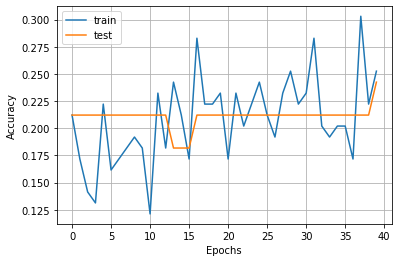

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

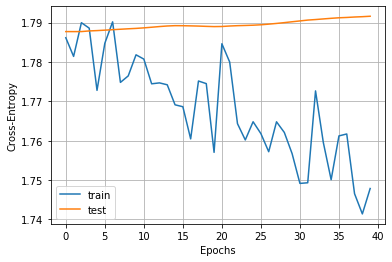

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [0]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[0 1 0 0 4 0]
 [0 4 0 0 1 0]
 [0 4 0 0 4 0]
 [0 3 0 0 0 0]
 [0 0 0 0 4 0]
 [0 3 0 0 5 0]]


In [0]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.27      0.80      0.40         5
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         3
           4       0.22      1.00      0.36         4
           5       0.00      0.00      0.00         8

    accuracy                           0.24        33
   macro avg       0.08      0.30      0.13        33
weighted avg       0.07      0.24      0.10        33



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
